In [105]:
import os
import re
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
sentiment = SentimentIntensityAnalyzer()

## Phase 1

In [136]:
path_to_test = '/Users/anthonyknutson/Desktop/IT-797A/FINALPROJECT/test_data.csv'

In [88]:
test_data = pd.read_csv(path_to_test)

In [89]:
test_data.head()

,Confirmed Score,Phrase
0,pos,"for real, the best thing about the movies is g..."
1,neg,I hate that I can never find a parking spot!
2,neg,"for real, I hate that the movies always have p..."
3,pos,I love that I can ride my bike in the summer
4,neg,Why do we always end up fighting over the remo...


In [90]:
test_data['polarity_score'] = test_data['Phrase'].apply(lambda Phrase: sentiment.polarity_scores(Phrase))

In [91]:
test_data['compound'] = test_data['polarity_score'].apply(lambda d:d['compound'])

In [92]:
test_data['comp_score'] = test_data['compound'].apply(lambda score: 'neu' if score==0 else('pos' if score >0 else 'neg'))

In [93]:
test_data

,Confirmed Score,Phrase,polarity_score,compound,comp_score
0,pos,"for real, the best thing about the movies is g...","{'neg': 0.0, 'neu': 0.728, 'pos': 0.272, 'comp...",0.6696,pos
1,neg,I hate that I can never find a parking spot!,"{'neg': 0.4, 'neu': 0.6, 'pos': 0.0, 'compound...",-0.6114,neg
2,neg,"for real, I hate that the movies always have p...","{'neg': 0.27, 'neu': 0.73, 'pos': 0.0, 'compou...",-0.5719,neg
3,pos,I love that I can ride my bike in the summer,"{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'comp...",0.6369,pos
4,neg,Why do we always end up fighting over the remo...,"{'neg': 0.217, 'neu': 0.783, 'pos': 0.0, 'comp...",-0.3612,neg
5,neu,computers are going to save the human race one...,"{'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'comp...",0.4939,pos
6,neu,I wonder if cats and dogs will ever cohesively...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu


#### We had 1 out of 7 in the small test data that was incorrectly tagged by VADER Sentinment Analysis

In [94]:
from sklearn.metrics import accuracy_score, classification_report

In [95]:
accuracy_score(test_data['Confirmed Score'], test_data['comp_score'])

0.8571428571428571

In [96]:
print(classification_report(test_data['Confirmed Score'], test_data['comp_score']))

              precision    recall  f1-score   support

         neg       1.00      1.00      1.00         3
         neu       1.00      0.50      0.67         2
         pos       0.67      1.00      0.80         2

    accuracy                           0.86         7
   macro avg       0.89      0.83      0.82         7
weighted avg       0.90      0.86      0.85         7



## Phase 2

In [97]:
phase2 = '/Users/anthonyknutson/Desktop/IT-797A/FINALPROJECT/READY/2020/185.25.51.173-20201102_en-US_CLEANED.json'

In [98]:
data = pd.read_json(phase2) # read in the json files
dfs = pd.DataFrame(data) # put it into a DataFrame

In [99]:
dfs['body'] = dfs['body'].str.lower()

In [100]:
dfs['body']

0      hello procles for target{backslash}n{backslash...
1      hello{backslash}n{backslash}pbot{backslash}nik...
2                                                    yes
3      hello. i am being contacted by a certain stern...
4                                                 poiwet
                             ...                        
369    it's not clear what's wrong with the echo yet{...
370                                    will become clear
371                                                hello
372    download: https://qaz.im/load/ie5kgb/9adnt4{ba...
373                                             pass 123
Name: body, Length: 374, dtype: object

In [101]:
# Data Normalization
dfs['body'] = dfs['body'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ',regex=True) #remove URLs
dfs['body'] = dfs['body'].str.replace(r"[\"\'\|\?\=\.\@\#\*\&\,]", '',regex=True) # remove special characters
dfs['body'] = dfs['body'].str.replace('{backslash}',r'\&', regex=True) # Remove backslash ASCII
dfs['body'] = dfs['body'].str.replace(r'\\n',  ' ', regex=True) # remove new lines
dfs['body'] = dfs['body'].str.replace(r'\\pbot',  ' ', regex=True) # remove bot stuff

In [102]:
dfs['polarity_score'] = dfs['body'].apply(lambda body: sentiment.polarity_scores(body))

In [103]:
dfs['compound'] = dfs['polarity_score'].apply(lambda d:d['compound'])

In [104]:
dfs['comp_score'] = dfs['compound'].apply(lambda score: 'neu' if score==0 else('pos' if score >0 else 'neg'))

neu    249
pos     80
neg     45
Name: comp_score, dtype: int64

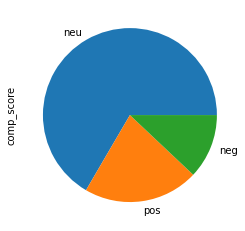

In [105]:
dfs['comp_score'].value_counts().plot(kind='pie') # count total
dfs['comp_score'].value_counts()

## Phase 3

In [91]:
path_to_json = '/Users/anthonyknutson/Desktop/IT-797A/FINALPROJECT/READY/2020/'
json_files = [path_to_json + "/" + pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]

In [92]:
for file in json_files: # recurse over json_file for each file
    with open(file) as myfile:
        contents=myfile.read()
        contents=re.sub(r"Body","body",contents)
        contents=re.sub(r"body","body",contents)
        with open(file,'w') as outfile:
            outfile.write(contents)

In [93]:
dfp = pd.DataFrame() # empty list to store the DataFrame
for file in json_files:
    data = pd.read_json(file) # read in the json files
    df = pd.DataFrame(data) # put it into a DataFrame
    dfp=pd.concat([df,dfp], ignore_index=True) # concat them all together

In [94]:
dfp['body'] = dfp['body'].str.lower()

In [110]:
dfp['body']

0                                 hello\&popper
1           give me the new eheh then/reinstall
2         flm-lt-ttipps2\&nfioritto\&n\&nnpopup
3                                    understood
4                                         hello
                          ...                  
107958       remind me which dll is the problem
107959                                     made
107960                                     here
107961                                         
107962                                 pass 123
Name: body, Length: 107963, dtype: object

In [112]:
dfp.to_csv('phase3.csv',columns=['body'], index=False)

In [114]:
phase3 = pd.read_csv('phase3.csv')
phase3.head()

,body
0,hello\&popper
1,give me the new eheh then/reinstall
2,flm-lt-ttipps2\&nfioritto\&n\&nnpopup
3,understood
4,hello


In [116]:
phase3['polarity_score'] = phase3['body'].apply(lambda body: sentiment.polarity_scores(str(body)))

In [117]:
# Sentiment Analysis
phase3['compound'] = phase3['polarity_score'].apply(lambda d: d['compound'])
phase3['comp_score'] = phase3['compound'].apply(lambda score: 'neu' if score == 0 else ('pos' if score > 0 else 'neg'))

neu    46836
pos    13953
neg     9468
Name: comp_score, dtype: int64

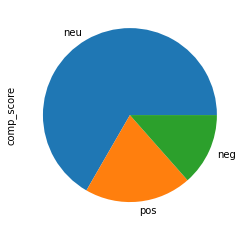

In [119]:
phase3['comp_score'].value_counts().plot(kind='pie') # count total
phase3['comp_score'].value_counts()

## Phase 4

### 2021 Data

In [120]:
path_to_json = '/Users/anthonyknutson/Desktop/IT-797A/FINALPROJECT/READY/2021/'
json_files = [path_to_json + "/" + pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]

In [121]:
for file in json_files:  # recurse over json_file for each file
    with open(file) as myfile:
        contents = myfile.read()
        contents = re.sub(r"Body", "body", contents)
        contents = re.sub(r"body", "body", contents)
        with open(file, 'w') as outfile:
            outfile.write(contents)

In [122]:
dfp = pd.DataFrame()  # empty list to store the DataFrame
for file in json_files:
    data = pd.read_json(file)  # read in the json files
    df = pd.DataFrame(data)  # put it into a DataFrame
    dfp = pd.concat([df, dfp], ignore_index=True)  # concat them all together

In [123]:
dfp['body'] = dfp['body'].str.lower()

In [124]:
dfp['body']

0        hello, look at the vntz, it doesn't work at al...
1        do it as soon as possible, it's not possible t...
2               stupid doesn't load beyond the stick input
3                         something's not letting it load.
4                         and i'm working on it right now.
                               ...                        
56567    prviet, bro. got the crypto report ready for 0...
56568    leo project 8 crypts bild machine{backslash}n{...
56569                                  idite nahui spameri
56570                                  idite nahui spameri
56571                                                    1
Name: body, Length: 56572, dtype: object

In [125]:
dfp['polarity_score'] = dfp['body'].apply(lambda body: sentiment.polarity_scores(str(body)))

In [126]:
dfp['compound'] = dfp['polarity_score'].apply(lambda d: d['compound'])
dfp['comp_score'] = dfp['compound'].apply(lambda score: 'neu' if score == 0 else ('pos' if score > 0 else 'neg'))

neu    43904
pos     8061
neg     4607
Name: comp_score, dtype: int64

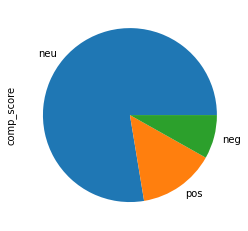

In [128]:
dfp['comp_score'].value_counts().plot(kind='pie') # count total
dfp['comp_score'].value_counts()

### 2022

In [130]:
path_to_json = '/Users/anthonyknutson/Desktop/IT-797A/FINALPROJECT/READY/2022/'
json_files = [path_to_json + "/" + pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]

In [131]:
for file in json_files:  # recurse over json_file for each file
    with open(file) as myfile:
        contents = myfile.read()
        contents = re.sub(r"Body", "body", contents)
        contents = re.sub(r"body", "body", contents)
        with open(file, 'w') as outfile:
            outfile.write(contents)

In [132]:
dfp = pd.DataFrame()  # empty list to store the DataFrame
for file in json_files:
    data = pd.read_json(file)  # read in the json files
    df = pd.DataFrame(data)  # put it into a DataFrame
    dfp = pd.concat([df, dfp], ignore_index=True)  # concat them all together

In [133]:
dfp['body'] = dfp['body'].str.lower()
dfp['body']

0                  there's a direct link to the chat room
1                                        and it has an id
2                                      you mean the note?
3                                              understood
4       show up already solve all these problems with ...
                              ...                        
4206                                            excellent
4207                                  get in touch please
4208                                                hello
4209                              set of 10 builds needed
4210                                                  new
Name: body, Length: 4211, dtype: object

neu    3047
pos     746
neg     418
Name: comp_score, dtype: int64

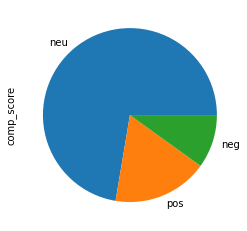

In [135]:
dfp['polarity_score'] = dfp['body'].apply(lambda body: sentiment.polarity_scores(str(body)))
dfp['compound'] = dfp['polarity_score'].apply(lambda d: d['compound'])
dfp['comp_score'] = dfp['compound'].apply(lambda score: 'neu' if score == 0 else ('pos' if score > 0 else 'neg'))

dfp['comp_score'].value_counts().plot(kind='pie')  # count total
dfp['comp_score'].value_counts()